In [1]:
from numpy.polynomial.polynomial import polyfit 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
durations = pd.read_csv('/Users/jess/Sf_m_dwarfs/sf_other_works/duration_data_hawley.csv')
amplitudes = pd.read_csv('/Users/jess/sf_m_dwarfs/sf_other_works/amplitude_data_hawley.csv')
print(durations)

        energy    duration
0    32.715293  137.110796
1    32.871404  136.130797
2    32.881608  129.464153
3    32.873597  105.149413
4    32.591826   98.575609
..         ...         ...
419  30.218739    3.879583
420  30.173779    3.907512
421  30.110858    3.992511
422  30.093176    3.879583
423  29.986022    3.851854

[424 rows x 2 columns]


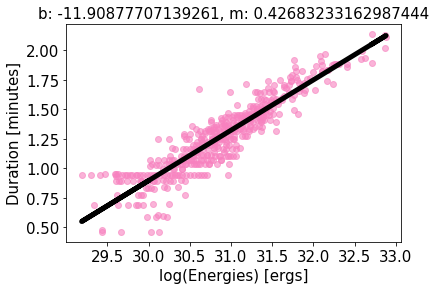

In [17]:
plt.scatter(durations['energy'], np.log10(durations['duration']), alpha=0.6, color='#f781bf')
b, m = polyfit(durations['energy'], np.log10(durations['duration']), deg=1)
plt.plot(durations['energy'], (b + (m * durations['energy'])), color='black',  linewidth=5)
plt.title('b: ' + str(b) + ', m: ' + str(m), fontsize=15)
plt.ylabel('Duration [minutes]', fontsize=15)
plt.xlabel('log(Energies) [ergs]', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('/Users/jess/sf_m_dwarfs/sf_plots/P_hawley_durations.png')
plt.show()

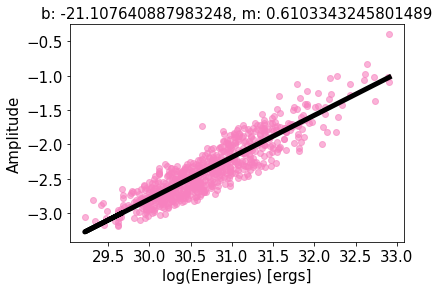

In [20]:
plt.scatter(amplitudes['energies'], np.log10(amplitudes['amplitude']), alpha=0.6, color='#f781bf')
b, m = polyfit(amplitudes['energies'], np.log10(amplitudes['amplitude']), deg=1)
plt.plot(amplitudes['energies'], (b + (m * amplitudes['energies'])), color='black',  linewidth=5)
plt.title('b: ' + str(b) + ', m: ' + str(m), fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.xlabel('log(Energies) [ergs]', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('/Users/jess/sf_m_dwarfs/sf_plots/P_hawley_amplitudes.png')
plt.show()